# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Import and Load the dataset

In [6]:
import pandas as pd

df = pd.read_csv('twitter_training.csv', encoding='latin1', header=None)

# Assign proper column names
df.columns = ['id', 'entity', 'sentiment', 'text']

df = df[['text', 'sentiment']]
df.head()


,text,sentiment
0,im getting on borderlands and i will murder yo...,Positive
1,I am coming to the borders and I will kill you...,Positive
2,im getting on borderlands and i will kill you ...,Positive
3,im coming on borderlands and i will murder you...,Positive
4,im getting on borderlands 2 and i will murder ...,Positive


In [9]:
# Drop rows where 'text' is missing (NaN)
df = df.dropna(subset=['text'])

# Ensure 'text' column is string type
df['text'] = df['text'].astype(str)



# Preprocessing text data

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)       # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)              # remove punctuation
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(preprocess)
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,sentiment,clean_text
0,im getting on borderlands and i will murder yo...,Positive,im get borderland murder
1,I am coming to the borders and I will kill you...,Positive,come border kill
2,im getting on borderlands and i will kill you ...,Positive,im get borderland kill
3,im coming on borderlands and i will murder you...,Positive,im come borderland murder
4,im getting on borderlands 2 and i will murder ...,Positive,im get borderland murder


# Encode Sentiments

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['sentiment_encoded'] = encoder.fit_transform(df['sentiment'])
df[['sentiment', 'sentiment_encoded']].drop_duplicates()


,sentiment,sentiment_encoded
0,Positive,3
12,Neutral,2
24,Negative,1
102,Irrelevant,0


# Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Extraction with TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


# Model Training (Logistic Regression Example)

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluation

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test_tfidf)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


[[1323  449  420  504]
 [ 168 3349  491  372]
 [ 223  479 2329  574]
 [ 211  399  542 2967]]
              precision    recall  f1-score   support

           0       0.69      0.49      0.57      2696
           1       0.72      0.76      0.74      4380
           2       0.62      0.65      0.63      3605
           3       0.67      0.72      0.70      4119

    accuracy                           0.67     14800
   macro avg       0.67      0.66      0.66     14800
weighted avg       0.67      0.67      0.67     14800

Accuracy: 0.67


# Label Encoding

In [17]:
import pandas as pd

# Load dataset
df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet']

# Check columns
print(df.head())

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['Sentiment'])
df[['Sentiment', 'label_encoded']].drop_duplicates()


   Tweet_ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                               Tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


,Sentiment,label_encoded
0,Positive,3
12,Neutral,2
24,Negative,1
102,Irrelevant,0


In [35]:
# Check existing columns again to confirm
print(df.columns)

# Rename columns if not done yet
df.columns = ['User', 'Sentiment', 'Tweet_ID', 'Tweet']

# Encode 'Sentiment' labels into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['Sentiment'])

# Download stopwords if not yet
import nltk
nltk.download('stopwords')

# Preprocessing Function
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'http\S+|www.\S+', '', text)
        text = re.sub(r'[^a-z\s]', '', text)
        tokens = text.split()
        tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    else:
        return ""

# Apply preprocessing to the 'Tweet' column
df['clean_text'] = df['Tweet'].apply(preprocess)

# Check if it's created successfully
df[['Tweet', 'clean_text']].head()


Index(['Tweet_ID', 'Entity', 'Sentiment', 'Tweet', 'label_encoded',
       'clean_text'],
      dtype='object')


ValueError: Length mismatch: Expected axis has 6 elements, new values have 4 elements

# Text Vectorization using TF-IDF

In [24]:
print(df.columns)

Index(['Tweet_ID', 'Entity', 'Sentiment', 'Tweet', 'label_encoded'], dtype='object')


In [25]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'http\S+|www.\S+', '', text)
        text = re.sub(r'[^a-z\s]', '', text)
        tokens = text.split()
        tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    else:
        return ""

df['clean_text'] = df['Tweet'].apply(preprocess)

# Confirm
print(df[['Tweet', 'clean_text']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               Tweet  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                  clean_text  
0   im get borderland murder  
1           come border kill  
2     im get borderland kill  
3  im come borderland murder  
4   im get borderland murder  


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])
y = df['label_encoded']

print(X.shape)


(74682, 5000)


# Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#  Train the Sentiment Model

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# Evaluate the Model

In [30]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.6794537055633662
              precision    recall  f1-score   support

  Irrelevant       0.66      0.52      0.59      2592
    Negative       0.72      0.76      0.74      4519
     Neutral       0.61      0.65      0.63      3596
    Positive       0.70      0.72      0.71      4230

    accuracy                           0.68     14937
   macro avg       0.67      0.66      0.67     14937
weighted avg       0.68      0.68      0.68     14937



In [33]:
y_pred = model.predict(X_test)


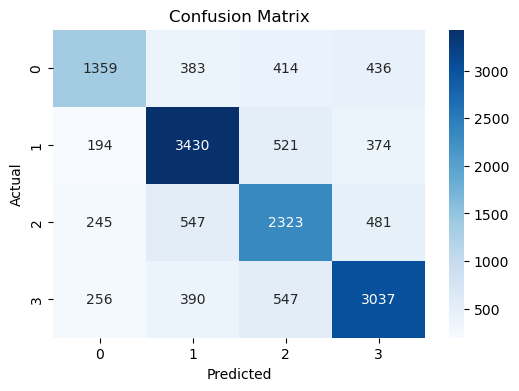

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
